Previous: [Intro](pipeline_intro.ipynb) ::: Next: [pipeline_preprocess](pipeline_preprocess.ipynb)


# Schema `experiment`

## Setup notebook appearance 

In [1]:
# make figures bigger
%pylab inline
pylab.rcParams['figure.figsize'] = (9, 7)

Populating the interactive namespace from numpy and matplotlib


## Modules = schemas 
The data pipeline consists of modules also called "schemas" because each module represents a schema (database) on the database server.  

The first schemas you need to know are `experiment`, `psy`, and `preprocessing`.  They contain information entered during experiments and immediate preprocessing of the data.

## Schema `experiment`

The `experiment` schema contains data entered manually during the experiment.

In [2]:
import datajoint as dj
from pipeline import experiment

DataJoint 0.3.2 (July 18, 2016)
Loading local settings from dj_local_conf.json


You can visualize the contents of any schema by using the `ERD` (entity relationship diagram) object:

/usr/local/lib/python3.5/site-packages/scipy/optimize/_basinhopping.py:291: RuntimeWarning: overflow encountered in exp
  w = min(1.0, np.exp(-(energy_new - energy_old) * self.beta))


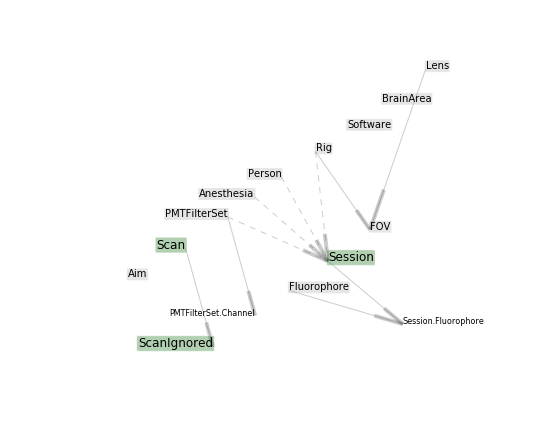

In [3]:
dj.ERD(experiment).draw()

Each node represents a table in the database and a class in the module.  The lines between them represents dependencies.

You may preview the contents any table using its `__repr__` method:

In [4]:
experiment.Session()

animal_id,session,rig,session_date,username,anesthesia,pmt_filter_set,scan_path,behavior_path,craniotomy_notes,session_notes,session_ts
7588,1,2P3,2016-02-08,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160208,/scratch01/WholeCell/jake/160208,,;;Nestin-GCaMP6s,2016-02-08 15:33:03
7588,2,2P3,2016-02-09,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160209,/scratch01/WholeCell/jake/160209,,;;Nestin-GCaMP6s,2016-02-09 22:31:23
7816,1,2P3,2016-02-10,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160210,/scratch01/WholeCell/jake/160210,,;;Emx1 Cre,2016-02-11 10:51:26
8158,1,2P3,2016-02-14,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160214,/scratch01/WholeCell/jake/160214,,;;Twitch targeted/Emx1,2016-02-14 14:35:58
8341,1,2P3,2016-02-15,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160215,/scratch01/WholeCell/jake/160215,,;;NEstin/GCaMP,2016-02-15 15:08:10
8487,1,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8623,1,2P3,2016-02-17,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160217,/scratch01/WholeCell/jake/160217,,CamKII-tTA/tetO-GCaMP6s;;CamKII-tTA/tetO-GCaMP,2016-02-17 13:05:17


We use the terms _table_ and _relation_ interchangeably.  A table _row_ may also be called a _tuple_.

You may _restrict_ a relaiton to a subset of its rows using the `&` operator:

In [5]:
experiment.Session() & 'session_date>"2016-05-01"' & 'username="Jake"'

animal_id,session,rig,session_date,username,anesthesia,pmt_filter_set,scan_path,behavior_path,craniotomy_notes,session_notes,session_ts
9036,1,2P3,2016-05-20,jake,awake,2P3 red-green A,/scratch03/Two-Photon/Jake/160520,/scratch01/WholeCell/jake/150520,,";;dura removed, 2 wks after craniotomy",2016-05-23 17:45:21
9240,1,2P3,2016-05-18,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160518,/scratch01/WholeCell/jake/160518,,not sure V1 NOTE DIFFERENT FILEBASE;;CamKII-tTA/tetO-GCaMP6s 1.5 weeks after window by shan,2016-05-18 18:04:12
10144,1,2P3,2016-06-16,jake,awake,2P3 red-green A,/scratch03/Two-Photon/Jake/160616,/scratch03/WholeCell/jake/160616,,;;Nestin-EscTwitch,2016-06-16 18:21:58


You may restrict one relation by another:

In [6]:
recent = experiment.Session() & 'session_date>"2016-05-01"'
(experiment.Scan() & 'laser_power>50') & recent

animal_id,session,scan_idx,lens,brain_area,laser_wavelength,laser_power,filename,behavior_filename,depth,scan_notes,site_number,software,version,scan_ts
9929,1,4,25x,V1,920.0,60.0,m9929A_00043,,310,,0,scanimage,5.1,2016-06-27 20:02:00


The negative restriction uses the - operator and denotes "all except":

In [7]:
experiment.Scan() - recent  & 'laser_power>=60'

animal_id,session,scan_idx,lens,brain_area,laser_wavelength,laser_power,filename,behavior_filename,depth,scan_notes,site_number,software,version,scan_ts
7588,1,1,25x,V1,920.0,60.0,m7588A_00001,,160,flashing bar,1,scanimage,5.1,2016-02-08 15:35:18
7588,1,4,25x,V1,920.0,60.0,m7588A_00004,,160,trippy/monet,4,scanimage,5.1,2016-02-08 16:26:05
7588,2,2,25x,V1,920.0,60.0,m7588A_00002,,260,triipy/monet,1,scanimage,5.1,2016-02-09 22:32:18
7816,1,34,25x,V1,920.0,60.0,m7816A_00034,,256,,9,scanimage,5.1,2016-02-11 11:38:12


You may join two tables into one using the `*` operator.  

In [8]:
scans = experiment.Scan()*experiment.Session() & (experiment.Session.Fluorophore() & dict(fluorophore="GCaMP6f"))
scans

animal_id,session,scan_idx,lens,brain_area,laser_wavelength,laser_power,filename,behavior_filename,depth,scan_notes,site_number,software,version,scan_ts,rig,session_date,username,anesthesia,pmt_filter_set,scan_path,behavior_path,craniotomy_notes,session_notes,session_ts
8487,1,5,25x,V1,920.0,15.0,m8487A_00005,,125,,1,scanimage,5.1,2016-02-26 17:21:42,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8487,1,6,25x,V1,920.0,18.0,m8487A_00006,,150,,2,scanimage,5.1,2016-02-26 17:52:50,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8487,1,7,25x,V1,920.0,18.0,m8487A_00007,,150,,2,scanimage,5.1,2016-02-26 17:53:14,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8487,1,8,25x,V1,920.0,18.0,m8487A_00008,,175,,3,scanimage,5.1,2016-02-26 19:30:37,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8487,1,9,25x,V1,920.0,21.0,m8487A_00009,,200,,4,scanimage,5.1,2016-02-26 19:30:52,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8487,1,10,25x,V1,920.0,24.0,m8487A_00010,,225,,5,scanimage,5.1,2016-02-26 19:36:31,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8487,1,11,25x,V1,920.0,28.0,m8487A_00011,,250,does not open its eye much,6,scanimage,5.1,2016-02-26 20:21:50,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00


Joins and restrictions with other relations are meaningful even when they are not directly linked in the ERD. As long as there is a path from table `A` to `B` along solid lines, the join `A * B` or the restriction `A & B` is meaningful.  

Solid lines represent prime dependencies, which propagate identifying information down the hiearachy. 

You can see the descriptions of all attributes using the heading property:

In [9]:
scans.heading

animal_id            : int                          # id number
session              : smallint                     # session index for the mouse
scan_idx             : smallint                     # number of TIFF stack file
---
lens                 : char(4)                      # objective lens
brain_area           : char(12)                     # short name for cortical area
laser_wavelength     : float                        # (nm)
laser_power          : float                        # (mW) to brain
filename             : varchar(255)                 # file base name
behavior_filename="" : varchar(255)                 # pupil movies, whisking, locomotion, etc.
depth=0              : int                          # manual depth measurement
scan_notes           : varchar(4095)                # free-notes
site_number=0        : tinyint                      # site number
software             : varchar(20)                  # name of the software
version              : char(10)           

When the desired query is formed, the data may be retrived using the `fetch` method:

In [10]:
scans.fetch()

array([ (8487, 1, 5, '25x', 'V1', 920.0, 15.0, 'm8487A_00005', '', 125, '', 1, 'scanimage', '5.1', datetime.datetime(2016, 2, 26, 17, 21, 42), '2P3', datetime.date(2016, 2, 26), 'unknown', 'awake', '2P3 red-green A', '/scratch01/Two-Photon/Jake/160226', '/scratch01/WholeCell/jake/160226', '', 'Emx1/ZtTA/Ai93;;', datetime.datetime(2016, 2, 26, 17, 19)),
       (8487, 1, 6, '25x', 'V1', 920.0, 18.0, 'm8487A_00006', '', 150, '', 2, 'scanimage', '5.1', datetime.datetime(2016, 2, 26, 17, 52, 50), '2P3', datetime.date(2016, 2, 26), 'unknown', 'awake', '2P3 red-green A', '/scratch01/Two-Photon/Jake/160226', '/scratch01/WholeCell/jake/160226', '', 'Emx1/ZtTA/Ai93;;', datetime.datetime(2016, 2, 26, 17, 19)),
       (8487, 1, 7, '25x', 'V1', 920.0, 18.0, 'm8487A_00007', '', 150, '', 2, 'scanimage', '5.1', datetime.datetime(2016, 2, 26, 17, 53, 14), '2P3', datetime.date(2016, 2, 26), 'unknown', 'awake', '2P3 red-green A', '/scratch01/Two-Photon/Jake/160226', '/scratch01/WholeCell/jake/160226', ''

Or as a list of dicts,

In [11]:
scans.fetch.as_dict()

[OrderedDict([('animal_id', 8487),
              ('session', 1),
              ('scan_idx', 5),
              ('lens', '25x'),
              ('brain_area', 'V1'),
              ('laser_wavelength', 920.0),
              ('laser_power', 15.0),
              ('filename', 'm8487A_00005'),
              ('behavior_filename', ''),
              ('depth', 125),
              ('scan_notes', ''),
              ('site_number', 1),
              ('software', 'scanimage'),
              ('version', '5.1'),
              ('scan_ts', datetime.datetime(2016, 2, 26, 17, 21, 42)),
              ('rig', '2P3'),
              ('session_date', datetime.date(2016, 2, 26)),
              ('username', 'unknown'),
              ('anesthesia', 'awake'),
              ('pmt_filter_set', '2P3 red-green A'),
              ('scan_path', '/scratch01/Two-Photon/Jake/160226'),
              ('behavior_path', '/scratch01/WholeCell/jake/160226'),
              ('craniotomy_notes', ''),
              ('session_notes', 

You can fetch just the desired attributes using the `fetch['attr1', ..., 'attrn']` notation:

In [12]:
d, i= scans.fetch['session_date', 'scan_idx']

If you are curious, you may see the underlying SQL queries using the `make_sql` method:

In [13]:
scans.make_sql()

"SELECT `animal_id`,`session`,`scan_idx`,`lens`,`brain_area`,`laser_wavelength`,`laser_power`,`filename`,`behavior_filename`,`depth`,`scan_notes`,`site_number`,`software`,`version`,`scan_ts`,`rig`,`session_date`,`username`,`anesthesia`,`pmt_filter_set`,`scan_path`,`behavior_path`,`craniotomy_notes`,`session_notes`,`session_ts` FROM `pipeline_experiment`.`scan` NATURAL JOIN `pipeline_experiment`.`session` WHERE ((`animal_id`,`session`) in (SELECT `animal_id`,`session` FROM `pipeline_experiment`.`session__fluorophore` WHERE (`fluorophore`='GCaMP6f')))"

Next: [pipeline_preprocess](pipeline_preprocess.ipynb)